#### Final Project : Loan Data Approval
  
###### Name: Grifith Pradeep Pereira: 100991416


#### Loan Approval Prediction

#### In this project, we will preprocess the data, perform exploratory data analysis, and implement various machine learning models to check which model performs better. By comparing the models, we aim to identify the most effective algorithm for this task.


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# Load the dataset
loan_data = pd.read_csv('loan_approval_dataset.csv')

## Data Exploration

In [ ]:
loan_data.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [ ]:
loan_data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
loan_data.shape

(4269, 13)

In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


## Step 1: Data Cleaning and EDA

In [ ]:
loan_data.columns = loan_data.columns.str.strip().str.lower().str.replace(' ', '_')

In [ ]:
loan_data= loan_data.drop(columns=['loan_id'])

In [ ]:
loan_data.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [ ]:
loan_data.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [ ]:
loan_data[['self_employed', 'loan_status', 'education']].apply(lambda col: col.unique())

,self_employed,loan_status,education
0,No,Approved,Graduate
1,Yes,Rejected,Not Graduate


In [ ]:
# Step 1: Strip spaces and lowercase values in the relevant columns
loan_data['education'] = loan_data['education'].str.strip().str.lower()
loan_data['self_employed'] = loan_data['self_employed'].str.strip().str.lower()
loan_data['loan_status'] = loan_data['loan_status'].str.strip().str.lower()

# Step 2: Apply the mapping again with normalized keys
loan_data['education'] = loan_data['education'].map({'graduate': 1, 'not graduate': 0})
loan_data['self_employed'] = loan_data['self_employed'].map({'yes': 1, 'no': 0})
loan_data['loan_status'] = loan_data['loan_status'].map({'approved': 1, 'rejected': 0})

# Verify the mapping worked correctly
print(loan_data[['education', 'self_employed', 'loan_status']].head())

   education  self_employed  loan_status
0          1              0            1
1          0              1            0
2          1              0            0
3          1              0            0
4          0              1            0


In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   no_of_dependents          4269 non-null   int64
 1   education                 4269 non-null   int64
 2   self_employed             4269 non-null   int64
 3   income_annum              4269 non-null   int64
 4   loan_amount               4269 non-null   int64
 5   loan_term                 4269 non-null   int64
 6   cibil_score               4269 non-null   int64
 7   residential_assets_value  4269 non-null   int64
 8   commercial_assets_value   4269 non-null   int64
 9   luxury_assets_value       4269 non-null   int64
 10  bank_asset_value          4269 non-null   int64
 11  loan_status               4269 non-null   int64
dtypes: int64(12)
memory usage: 400.3 KB


In [ ]:
#  Check for missing values in the dataset
missing_values = loan_data.isnull().sum()
print(missing_values)


no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64


In [ ]:
#  Check for duplicated values in the dataset
loan_data.duplicated().sum()

0

In [ ]:
#  Check for negative values in the dataset
(loan_data[loan_data.columns] < 0).sum()

no_of_dependents             0
education                    0
self_employed                0
income_annum                 0
loan_amount                  0
loan_term                    0
cibil_score                  0
residential_assets_value    28
commercial_assets_value      0
luxury_assets_value          0
bank_asset_value             0
loan_status                  0
dtype: int64

In [ ]:
# Remove rows with negative values in the 'residential_assets_value' column
loan_data = loan_data[loan_data['residential_assets_value'] >= 0]

In [ ]:
# Verify there are no negative values left
(loan_data[loan_data.columns] < 0).sum()

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [ ]:
numeric_columns = [
    'no_of_dependents','income_annum', 'loan_amount', 'loan_term',
    'cibil_score', 'residential_assets_value',
    'commercial_assets_value', 'luxury_assets_value',
    'bank_asset_value'
]

In [ ]:
# Check for outliers using the IQR method
outliers = {}
for col in numeric_columns:
    Q1 = loan_data[col].quantile(0.25)
    Q3 = loan_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = loan_data[(loan_data[col] < lower_bound) | (loan_data[col] > upper_bound)]

# Display columns with outliers
for col, outlier_rows in outliers.items():
    print(f"Column: {col}, Outliers: {len(outlier_rows)}")

Column: no_of_dependents, Outliers: 0
Column: income_annum, Outliers: 0
Column: loan_amount, Outliers: 0
Column: loan_term, Outliers: 0
Column: cibil_score, Outliers: 0
Column: residential_assets_value, Outliers: 47
Column: commercial_assets_value, Outliers: 32
Column: luxury_assets_value, Outliers: 0
Column: bank_asset_value, Outliers: 8


In [ ]:
print(outliers['residential_assets_value']['residential_assets_value'].head())
print(outliers['commercial_assets_value']['commercial_assets_value'].head())

82     25500000
98     25900000
123    26800000
228    25500000
262    25600000
Name: residential_assets_value, dtype: int64
0      17600000
157    18700000
231    17500000
258    19000000
367    18500000
Name: commercial_assets_value, dtype: int64


In [ ]:
import seaborn as sns
sns.set(style="whitegrid")
custom_palette = sns.color_palette(["#81c784", "#388e3c", "#74c69d"])

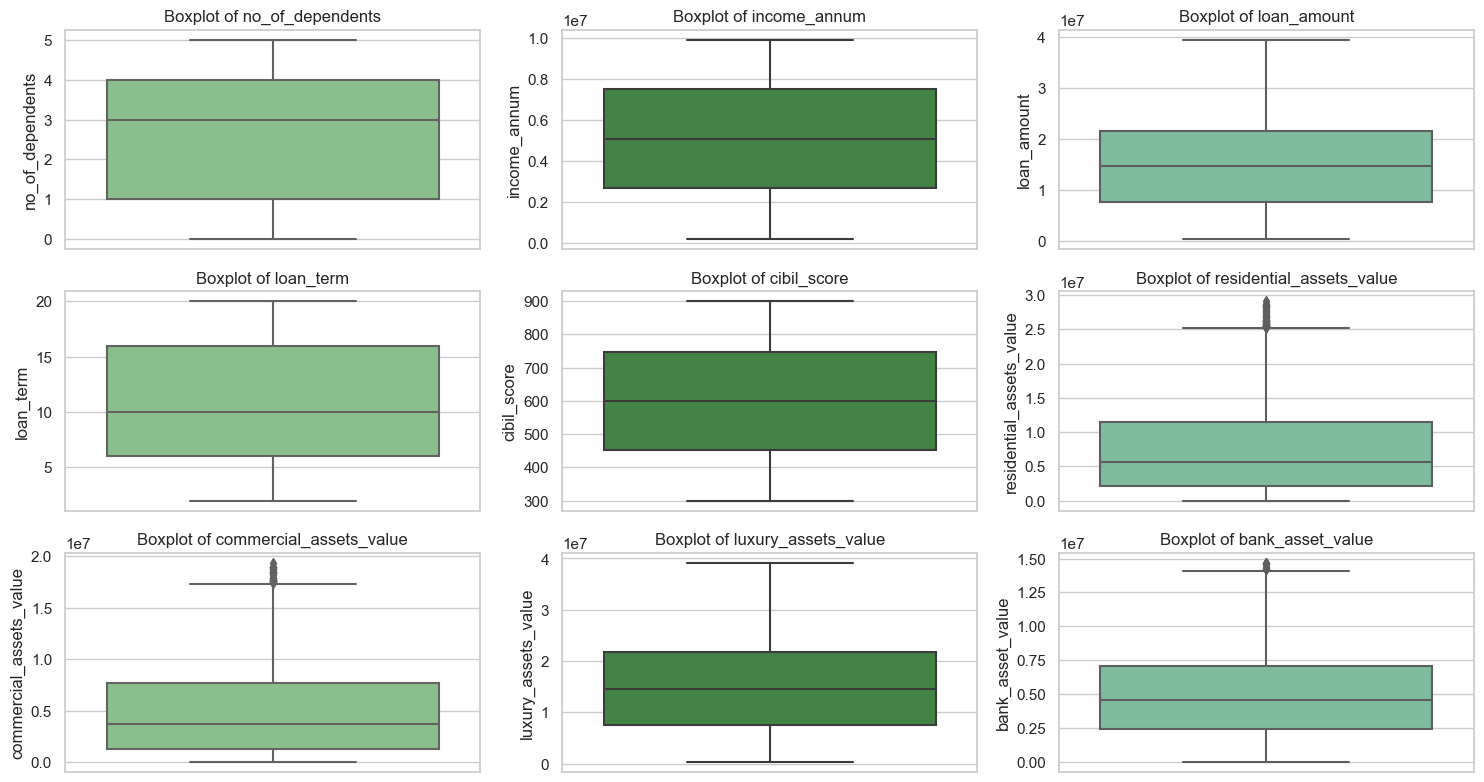

In [ ]:
import matplotlib.pyplot as plt

def plot_boxplots(loan_data, columns):
    plt.figure(figsize=(15, 8))
    for i, col in enumerate(columns):
        plt.subplot(3, 3, i + 1)
        sns.boxplot(y=loan_data[col], color=custom_palette[i % 3])
        plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

plot_boxplots(loan_data, numeric_columns)

##### # Handling Outliers
#####
In this dataset, columns like `residential_assets_value` and `commercial_assets_value` represent customer wealth, which can vary personally among customers. High or low asset values may represent high-net-worth individuals or customers with minimal assets, respectively. Since these outliers are domain-specif, a bank can have all kind of customers. So, these values arend likely valid, we will retain them and proceed without treating these as anomalies.


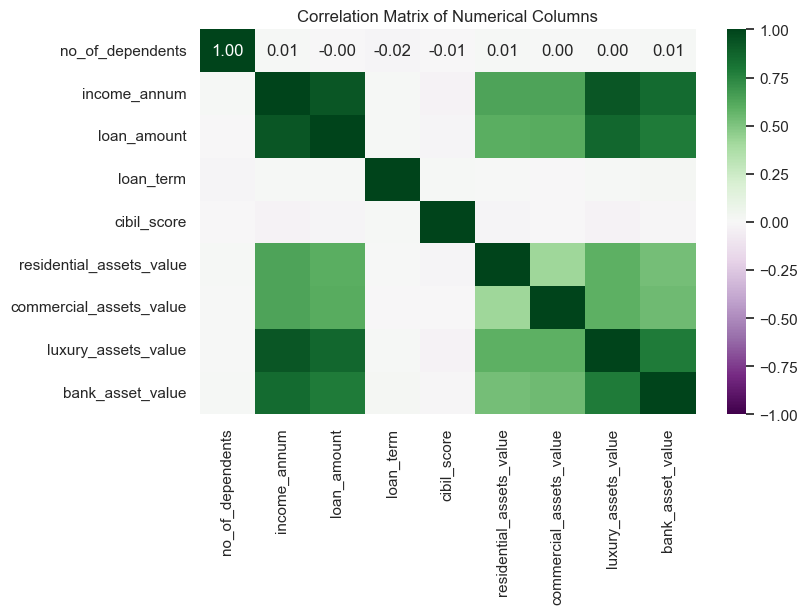

In [ ]:
# Compute the correlation matrix for numeric columns
correlation_matrix = loan_data[numeric_columns].corr()
# Set up the matplotlib figure
plt.figure(figsize=(8, 5))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="PRGn", vmin=-1, vmax=1)

# Add titles and labels
plt.title("Correlation Matrix of Numerical Columns")
plt.show()

In [ ]:
loan_data['total_asset_value'] = loan_data['residential_assets_value'] + loan_data['commercial_assets_value'] + loan_data['luxury_assets_value'] + loan_data['bank_asset_value']

loan_data_total = loan_data[
    [
        "no_of_dependents",
        "income_annum",
        "loan_amount",
        "loan_term",
        "cibil_score",
        'total_asset_value'
    ]
]

loan_data_total.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,total_asset_value
0,2,9600000,29900000,12,778,50700000
1,0,4100000,12200000,8,417,17000000
2,3,9100000,29700000,20,506,57700000
3,3,8200000,30700000,8,467,52700000
4,5,9800000,24200000,20,382,55000000


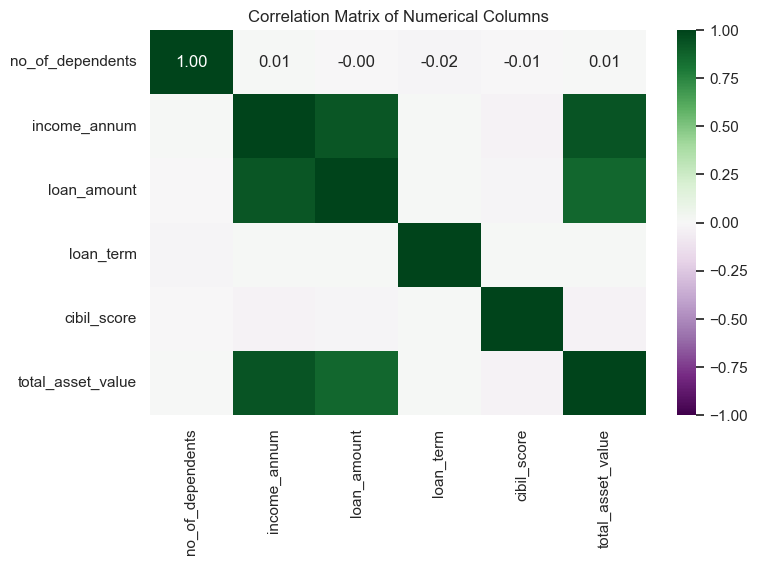

In [ ]:
# Compute the correlation matrix for numeric columns
correlation_matrix = loan_data_total[
    [
        "no_of_dependents",
        "income_annum",
        "loan_amount",
        "loan_term",
        "cibil_score",
        "total_asset_value",
    ]
].corr()
# Set up the matplotlib figure
plt.figure(figsize=(8, 5))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="PRGn", vmin=-1, vmax=1)

# Add titles and labels
plt.title("Correlation Matrix of Numerical Columns")
plt.show()

## Step 2: Splitting Data into Features and Target

In [ ]:
loan_data.columns


Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status', 'total_asset_value'],
      dtype='object')

In [ ]:
# Define x and y variables
loan_data = loan_data[[
    "no_of_dependents",
    "education",
    "self_employed",
    "income_annum",
    "loan_amount",
    "loan_term",
    "cibil_score",
    "loan_status",
    "total_asset_value",
]]
x = loan_data.drop('loan_status',axis=1).to_numpy()
y = loan_data['loan_status'].to_numpy()

# Create Train and Test Datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

# Scale the Data
from sklearn.preprocessing import StandardScaler
sc = RobustScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

# Define target class names for classification metrics (used in classification reports)
target_names=['Rejected','Approved']

## Step 3: Model Implementation
### Multiple models are implemented to predict loan approval status. These include:
### - Logistic Regression
### - Decision Trees
### - Random Forest
### - Neural Networks
### - Support Vector Machines (SVM)
### - Naive Bayes

### Each model is trained on the dataset, and its performance is evaluated using accuracy, precision, recall, and F1-score.

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    "C": [0.01, 0.1, 1, 10, 100],
    "penalty": ["l2"],  # Regularization type
    "solver": ["liblinear"],
}

# Perform Grid Search with CV
grid_search = GridSearchCV(
    LogisticRegression(random_state=100), param_grid, cv=5, scoring="accuracy"
)
grid_search.fit(x_train2, y_train)

# Optimal model
best_model = grid_search.best_estimator_
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Evaluate on the test set
test_accuracy = best_model.score(x_test2, y_test)
print(f"Test Accuracy of Optimal Model: {test_accuracy:.4f}")

predict = best_model.predict(x_test2)
print("\n***LOGISTIC REGRESSION***")
# Performance metrics on the test set
print("\n::Confusion Matrix::")
print(confusion_matrix(y_test, predict))
print("\n::Classification Report::")
print(classification_report(y_test, predict, target_names=target_names))
accuracy = accuracy_score(y_test, predict)
print(f"\n::Accuracy on Test Set:: {accuracy:.4f}")

Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Test Accuracy of Optimal Model: 0.9069

***LOGISTIC REGRESSION***

::Confusion Matrix::
[[276  43]
 [ 36 494]]

::Classification Report::
              precision    recall  f1-score   support

    Rejected       0.88      0.87      0.87       319
    Approved       0.92      0.93      0.93       530

    accuracy                           0.91       849
   macro avg       0.90      0.90      0.90       849
weighted avg       0.91      0.91      0.91       849


::Accuracy on Test Set:: 0.9069


#### Decision Tree

In [ ]:
# Script for Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    "criterion": ["gini", "entropy"],
}

# Perform Grid Search with CV
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=100), param_grid, cv=5, scoring="accuracy"
)
grid_search.fit(x_train2, y_train)

# Get the best model
best_dt_model = grid_search.best_estimator_
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Evaluate the best model on the test set
predict = best_dt_model.predict(x_test2)
accuracy = accuracy_score(y_test, predict)
print("\n**DECISION TREE**")
print("\n::Confusion Matrix::")
print(confusion_matrix(y_test, predict))
print("\n::Classification Report::")
print(classification_report(y_test, predict, target_names=target_names))
print(f"\n::Accuracy of Optimized Model:: {accuracy:.4f}")

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}

**DECISION TREE**

::Confusion Matrix::
[[310   9]
 [ 11 519]]

::Classification Report::
              precision    recall  f1-score   support

    Rejected       0.97      0.97      0.97       319
    Approved       0.98      0.98      0.98       530

    accuracy                           0.98       849
   macro avg       0.97      0.98      0.97       849
weighted avg       0.98      0.98      0.98       849


::Accuracy of Optimized Model:: 0.9764


### Random Forest

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters: {'n_estimators': 322, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 20, 'bootstrap': True}

::Accuracy of Tuned Random Forest:: 0.9859

**RANDOM FOREST**

::Confusion Matrix::
[[312   7]
 [  5 525]]

::Classification Report::
              precision    recall  f1-score   support

    Rejected       0.98      0.98      0.98       319
    Approved       0.99      0.99      0.99       530

    accuracy                           0.99       849
   macro avg       0.99      0.98      0.98       849
weighted avg       0.99      0.99      0.99       849


::Accuracy of Optimized Model:: 0.9859


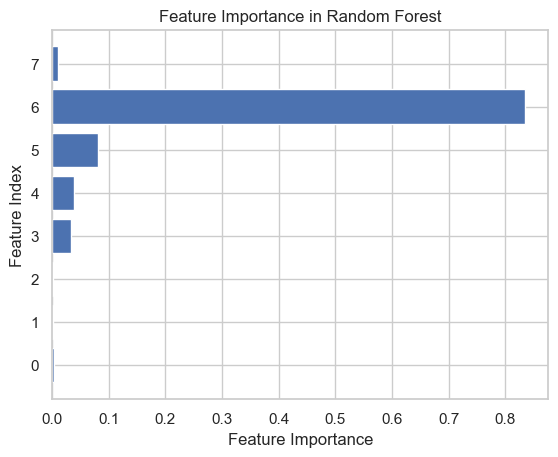

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

rf = RandomForestClassifier()

# Define the parameter grid
param_dist = {
    "n_estimators": [int(x) for x in np.linspace(start=100, stop=500, num=10)],
    "max_depth": [None, 10, 20, 30, 40],
    "min_samples_split": [2, 5, 10, 15],
    "min_samples_leaf": [1, 2, 4, 6],
    "max_features": ["sqrt", "log2", None],
    "bootstrap": [True, False],
}

# Initialize Randomized Search
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    scoring="accuracy",
    verbose=1,
    random_state=100,
    n_jobs=-1,
)
random_search.fit(x_train2, y_train)

# Best hyperparameters and model
print(f"Best Hyperparameters: {random_search.best_params_}")
best_rf_model = random_search.best_estimator_

# Test the best model
y_pred = best_rf_model.predict(x_test2)
accuracy = accuracy_score(y_test, y_pred)
print(f"\n::Accuracy of Tuned Random Forest:: {accuracy:.4f}")
print("\n**RANDOM FOREST**")
# Confusion Matrix
print("\n::Confusion Matrix::")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\n::Classification Report::")
print(classification_report(y_test, y_pred, target_names=target_names))
print(f"\n::Accuracy of Optimized Model:: {accuracy:.4f}")

# Feature Importance
import matplotlib.pyplot as plt

importances = best_rf_model.feature_importances_
plt.barh(range(len(importances)), importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Index")
plt.title("Feature Importance in Random Forest")
plt.show()

#### Neural Networks

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

# Define parameter grid
param_grid = {
    "hidden_layer_sizes": [(4, 3, 3), (6, 4), (10, 5)],
    "activation": ["relu", "tanh", "logistic"],
    "solver": ["adam", "sgd"],
    "alpha": [0.0001, 0.001, 0.01],
    "learning_rate_init": [0.001, 0.01, 0.1],
}

# Initialize the model
mlp = MLPClassifier(max_iter=10000, random_state=100)

# Grid Search
grid_search = GridSearchCV(
    estimator=mlp, param_grid=param_grid, cv=5, scoring="accuracy", verbose=1, n_jobs=-1
)
grid_search.fit(x_train2, y_train)

# Get the best model and parameters
best_mlp = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Test the best model
predictions = best_mlp.predict(x_test2)
accuracy = accuracy_score(y_test, predictions)

# Evaluation
print("\n**NEURAL NETWORKS**")
print("\n::Confusion Matrix::")
print(confusion_matrix(y_test, predictions))
print("\n::Classification Report::")
print(classification_report(y_test, predictions, target_names=target_names))
accuracy = accuracy_score(y_test, predictions)
print(f"\n::Accuracy:: {accuracy:.4f}")

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (6, 4), 'learning_rate_init': 0.1, 'solver': 'sgd'}

**NEURAL NETWORKS**

::Confusion Matrix::
[[310   9]
 [  1 529]]

::Classification Report::
              precision    recall  f1-score   support

    Rejected       1.00      0.97      0.98       319
    Approved       0.98      1.00      0.99       530

    accuracy                           0.99       849
   macro avg       0.99      0.98      0.99       849
weighted avg       0.99      0.99      0.99       849


::Accuracy:: 0.9882


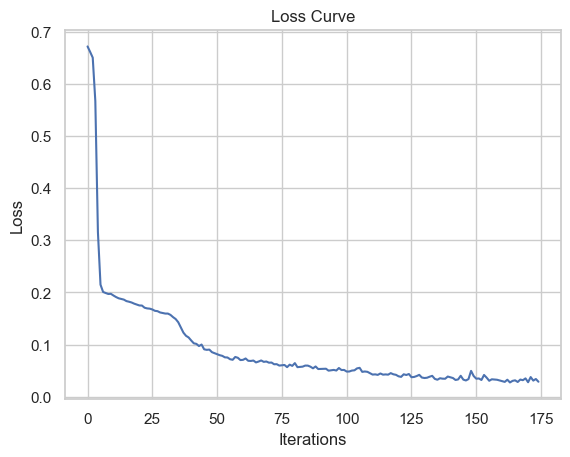

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss curve
plt.plot(best_mlp.loss_curve_)
plt.title("Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

#### SVM-Support Vector Machines (SVM)

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score

# Normalize the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train2)
x_test_scaled = scaler.transform(x_test2)

# Define and train the SVM model
svc = SVC(kernel="linear", random_state=100)
svc.fit(x_train_scaled, y_train)

# Make predictions
y_pred = svc.predict(x_test_scaled)

# Evaluation
print("\n**SVM**")
print("\n::Confusion Matrix::")
print(confusion_matrix(y_test, y_pred))
print("\n::Classification Report::")
print(classification_report(y_test, y_pred, target_names=target_names))
accuracy = accuracy_score(y_test, y_pred)
print(f"\n::Accuracy:: {accuracy:.4f}")

# Hyperparameter tuning using GridSearchCV
param_grid = {
    "C": [0.1, 1, 10, 100],
    "kernel": ["linear", "rbf", "poly", "sigmoid"],
    "gamma": ["scale", "auto"],
}

grid_search = GridSearchCV(
    SVC(random_state=100), param_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=1
)
grid_search.fit(x_train_scaled, y_train)

# Best model evaluation
best_svm = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")
y_pred_best = best_svm.predict(x_test_scaled)

# Final evaluation
print("\n::Confusion Matrix::")
print(confusion_matrix(y_test, y_pred_best))
print("\n::Classification Report::")
print(classification_report(y_test, y_pred_best, target_names=target_names))
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"\n::Accuracy of Tuned SVM:: {accuracy_best:.4f}")


**SVM**

::Confusion Matrix::
[[285  34]
 [ 39 491]]

::Classification Report::
              precision    recall  f1-score   support

    Rejected       0.88      0.89      0.89       319
    Approved       0.94      0.93      0.93       530

    accuracy                           0.91       849
   macro avg       0.91      0.91      0.91       849
weighted avg       0.91      0.91      0.91       849


::Accuracy:: 0.9140
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters: {'C': 100, 'gamma': 'auto', 'kernel': 'poly'}

::Confusion Matrix::
[[292  27]
 [ 17 513]]

::Classification Report::
              precision    recall  f1-score   support

    Rejected       0.94      0.92      0.93       319
    Approved       0.95      0.97      0.96       530

    accuracy                           0.95       849
   macro avg       0.95      0.94      0.94       849
weighted avg       0.95      0.95      0.95       849


::Accuracy of Tuned SVM:: 0.9482


#### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Scale the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train2)
x_test_scaled = scaler.transform(x_test2)

# Initialize and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(x_train_scaled, y_train)

# Predict on the test set
y_pred = nb_model.predict(x_test_scaled)

# Evaluation
print("\n**NAIVE BAYES**")
print("\n::Confusion Matrix::")
print(confusion_matrix(y_test, y_pred))
print("\n::Classification Report::")
print(classification_report(y_test, y_pred, target_names=target_names))
accuracy = accuracy_score(y_test, y_pred)
print(f"\n::Accuracy:: {accuracy:.4f}")

# Training and test accuracy
train_accuracy = nb_model.score(x_train_scaled, y_train)
test_accuracy = nb_model.score(x_test_scaled, y_test)

print(f"\nTraining Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Cross-validation
cv_scores = cross_val_score(
    GaussianNB(), x_train_scaled, y_train, cv=5, scoring="accuracy"
)
print(f"\n::Cross-Validation Accuracy:: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


**NAIVE BAYES**

::Confusion Matrix::
[[292  27]
 [ 35 495]]

::Classification Report::
              precision    recall  f1-score   support

    Rejected       0.89      0.92      0.90       319
    Approved       0.95      0.93      0.94       530

    accuracy                           0.93       849
   macro avg       0.92      0.92      0.92       849
weighted avg       0.93      0.93      0.93       849


::Accuracy:: 0.9270

Training Accuracy: 0.9354
Test Accuracy: 0.9270

::Cross-Validation Accuracy:: 0.9334 ± 0.0074


## Step 4: Plotting ROC and AUC

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


In [ ]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Dictionary of trained models with their actual variable names
models = {
    'Logistic Regression': best_model.fit(x_train2, y_train),
    'Decision Tree': best_dt_model.fit(x_train2, y_train),
    'Random Forest': best_rf_model.fit(x_train2, y_train),
    'Neural Network': best_mlp.fit(x_train2, y_train),
    'SVM': best_svm.fit(x_train2, y_train),
    'Naive Bayes': nb_model.fit(x_train2, y_train),
}

# Dictionary to store metrics
metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

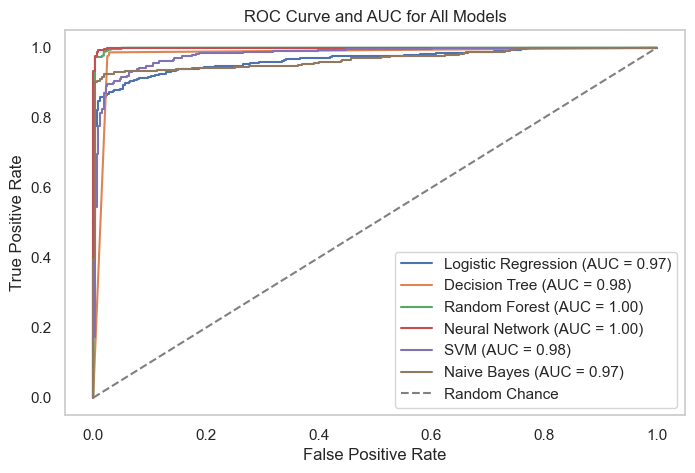

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Initialize a plot
plt.figure(figsize=(8, 5))

# Loop through each model and calculate its ROC curve and AUC
for model_name, model in models.items():
    # Get predicted probabilities for models that support it
    if hasattr(model, 'predict_proba'):  # Check if the model supports predict_proba
        y_prob = model.predict_proba(x_test2)[:, 1]
    elif hasattr(model, 'decision_function'):  # Use decision_function for SVM
        y_prob = model.decision_function(x_test2)
    else:
        raise ValueError(f"Model {model_name} does not support probability prediction.")

    # Calculate the ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)

    # Calculate the AUC
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot the diagonal line for random chance
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Chance')

# Add plot details
plt.title('ROC Curve and AUC for All Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()

# Show the plot
plt.show()


In [ ]:
for model_name, model in models.items():
    # Predictions
    y_pred = model.predict(x_test2)

    # Append metrics for the current model
    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy_score(y_test, y_pred))
    metrics["Precision"].append(precision_score(y_test, y_pred, average='binary'))
    metrics["Recall"].append(recall_score(y_test, y_pred, average='binary'))
    metrics["F1-Score"].append(f1_score(y_test, y_pred, average='binary'))


In [ ]:
# Convert metrics to DataFrame
performance_df = pd.DataFrame(metrics)
performance_df


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.906949,0.919926,0.932075,0.925961
1,Decision Tree,0.976443,0.982955,0.979245,0.981096
2,Random Forest,0.984688,0.984991,0.990566,0.987770
3,Neural Network,0.988221,0.983271,0.998113,0.990637
4,SVM,0.930506,0.933702,0.956604,0.945014
5,Naive Bayes,0.926973,0.948276,0.933962,0.941065


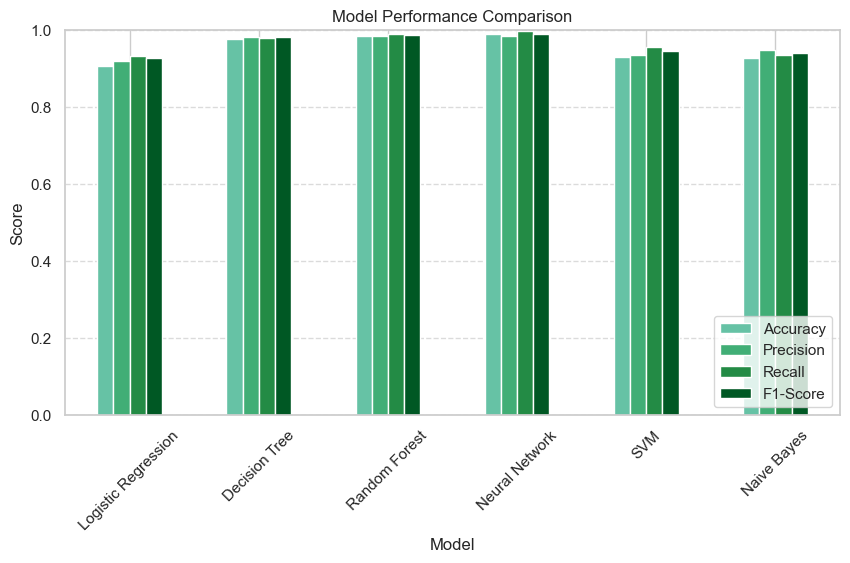

In [ ]:
# Define custom colors for the metrics
colors = ["#66c2a5", "#41ae76", "#238b45", "#005824"]  # Example colors for Accuracy, Precision, Recall, F1-Score

# Plot performance metrics for comparison
performance_df.set_index("Model")[["Accuracy", "Precision", "Recall", "F1-Score"]].plot(
    kind="bar", figsize=(10, 5), color=colors
)

# Add titles and labels
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)  # Ensure all metrics are on the same scale
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend(loc="lower right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


## CLUSTRING

### K-MEANS

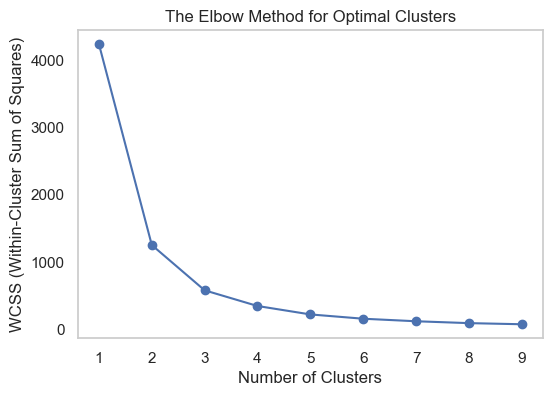

For n_clusters = 2, Silhouette Coefficient = 0.5945
For n_clusters = 3, Silhouette Coefficient = 0.5716
For n_clusters = 4, Silhouette Coefficient = 0.5483
For n_clusters = 5, Silhouette Coefficient = 0.5512
For n_clusters = 6, Silhouette Coefficient = 0.5453
For n_clusters = 7, Silhouette Coefficient = 0.5344
For n_clusters = 8, Silhouette Coefficient = 0.5364
For n_clusters = 9, Silhouette Coefficient = 0.5301


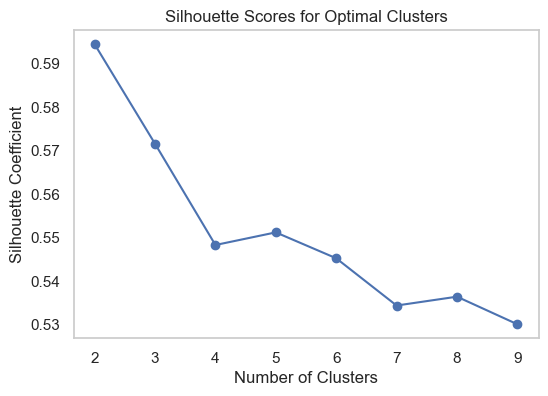

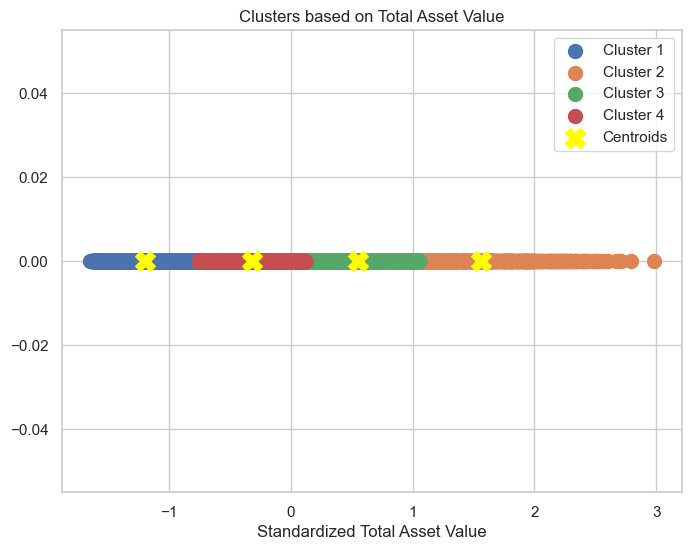

   total_asset_value    Cluster
0           50700000  Cluster 3
1           17000000  Cluster 1
2           57700000  Cluster 2
3           52700000  Cluster 3
4           55000000  Cluster 2
            count          mean           std         min         25%  \
Cluster                                                                 
Cluster 1  1152.0  9.287847e+06  4.925514e+06    500000.0   5000000.0   
Cluster 2   718.0  6.314387e+07  7.442444e+06  53300000.0  57000000.0   
Cluster 3  1156.0  4.353192e+07  5.312960e+06  35000000.0  39000000.0   
Cluster 4  1215.0  2.649835e+07  4.974346e+06  17900000.0  22200000.0   

                  50%         75%         max  
Cluster                                        
Cluster 1   9300000.0  13700000.0  17800000.0  
Cluster 2  61500000.0  68000000.0  90700000.0  
Cluster 3  43100000.0  48200000.0  53200000.0  
Cluster 4  26400000.0  30750000.0  34900000.0  


In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Load and Scale the Data
# Assuming 'total_asset_value' is part of your dataset

dataset2 = loan_data

scaler = StandardScaler()
data_transformed = scaler.fit_transform(
    dataset2[["total_asset_value"]]
)  # Scaling 'total_asset_value'

# Step 2: Determine Optimal Clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares
for i in range(1, 10):  # Testing 1 to 9 clusters
    kmeans = KMeans(
        n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=100
    )
    kmeans.fit(data_transformed)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(6, 4))
plt.plot(range(1, 10), wcss, marker="o")
plt.title("The Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.grid()
plt.show()

# Step 3: Validate with Silhouette Coefficients
silhouette_scores = []
for n_cluster in range(2, 10):  # Silhouette Coefficient requires at least 2 clusters
    kmeans = KMeans(
        n_clusters=n_cluster,
        init="k-means++",
        max_iter=300,
        n_init=10,
        random_state=100,
    )
    labels = kmeans.fit_predict(data_transformed)
    score = silhouette_score(data_transformed, labels, metric="euclidean")
    silhouette_scores.append(score)
    print(f"For n_clusters = {n_cluster}, Silhouette Coefficient = {score:.4f}")

# Plot Silhouette Scores
plt.figure(figsize=(6, 4))
plt.plot(range(2, 10), silhouette_scores, marker="o")
plt.title("Silhouette Scores for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.grid()
plt.show()

# Step 4: Apply KMeans with Optimal Number of Clusters
# Select optimal number of clusters from elbow or silhouette plots
optimal_clusters = 4  # Replace with chosen number based on the plots
kmeans = KMeans(
    n_clusters=optimal_clusters,
    init="k-means++",
    max_iter=300,
    n_init=10,
    random_state=100,
)
dataset2["Cluster"] = kmeans.fit_predict(data_transformed)

# Map cluster labels to meaningful names (optional)
dataset2["Cluster"] = dataset2["Cluster"].map(lambda x: f"Cluster {x+1}")

# Step 5: Visualize Clusters
plt.figure(figsize=(8, 6))
for i in range(optimal_clusters):
    plt.scatter(
        data_transformed[dataset2["Cluster"] == f"Cluster {i+1}", 0],
        np.zeros_like(data_transformed[dataset2["Cluster"] == f"Cluster {i+1}", 0]),
        s=100,
        label=f"Cluster {i+1}",
    )
# Add centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    np.zeros_like(kmeans.cluster_centers_[:, 0]),
    s=200,
    c="yellow",
    label="Centroids",
    marker="X",
)
plt.title("Clusters based on Total Asset Value")
plt.xlabel("Standardized Total Asset Value")
plt.legend()
plt.show()

# Step 6: Analyze Results
# Display dataset with cluster assignments
print(dataset2[["total_asset_value", "Cluster"]].head())

# Group by clusters for insights
cluster_analysis = dataset2.groupby("Cluster")["total_asset_value"].describe()
print(cluster_analysis)